In [1]:
## This version excludes CONTINUOUS Variables and the RFD variables AND _wHICH VARIABLES 3/27/2024 and con_max_consultorder_time/day and drg name
## 4/4/2024 Added QUINTILE variables
## 4/8/2024 Added QUINTILE varables by service
## 4/9/2024 Added more consult and imaging variables (e.g. ad,it order to consult order, admit order to imaging read)
## 4/11/2024 Added QUINTILE variables by service for the additional variables
# 06/12/2024: Added gender, added imaging_order_before_consult_order and consult_order_before_imaging order variables, excluded 290 patients in 2022, dropped raw race/insurance categories
# 06/14/2024: Removed quintiles
# 06/20/2024: Set seed for reproducibility
# 06/22/2024: Added sample size for validation
# 07/05/2024: Collapsed Cardiology into Medicine
# 07/08/2024: Added labels
# 07/25/2024: Removed duplicated patients from master file
# 08/01/2024: Changed XGBoost hyperparmeter tuning to Haipeng's code and using only one model, streamlined so all shap plots in one jupyter notebook
# 08/07/2024: Added continuous features back in, removed quintiles

In [2]:
import pandas as pd
import numpy as np
import os
import warnings
from los_functions_continuous import *
warnings.filterwarnings('ignore')

In [3]:
#all hospitalized patients 
df_all = pd.read_csv('/gpfs/milgram/project/rtaylor/imc33/LOS/data/master_los.csv', index_col=[0])
df_all["viz_service_collapsed"] = df_all["viz_service_collapsed"].apply(map_med)

#discharged home
df_home = df_all[df_all["viz_disp_collapsed"] == "Home"].copy()

#hf patients
df_all = pd.read_csv('/gpfs/milgram/project/rtaylor/imc33/LOS/data/master_los.csv', index_col=[0])
df_hf = df_all[df_all["viz_drg"]=="heart failure & shock w mcc"].copy()

In [4]:
# Dictionary of data frames with their names
dfs = {
    "df_all": df_all,
    "df_home": df_home,
    "df_hf":df_hf
}

#fp_simple = '/gpfs/milgram/project/rtaylor/imc33/LOS/data/features_los_simple.xlsx'
#fp_complex = '/gpfs/milgram/project/rtaylor/imc33/LOS/data/features_los.xlsx'
fp_continuous = '/gpfs/milgram/project/rtaylor/imc33/LOS/data/features_los_continuous.xlsx'
output_folder = '/gpfs/milgram/project/rtaylor/imc33/LOS/output'

### Continuous Features 

Running on df_all
Columns with >99% missing values ['summary_sw_consult_order_time', 'summary_sw_consult_order_day', 'con_max_consult_order_to_sign_colon_and_rectal_hrs', 'con_max_consult_order_to_sign_lab_medicine_hrs', 'con_max_consult_order_to_sign_picc_hrs', 'con_max_consult_order_to_sign_radiation_oncology_hrs', 'con_max_consult_order_to_sign_pharmacy_hrs', 'con_max_consult_order_to_sign_internal_medicine_hrs', 'con_max_consult_order_to_sign_neuro_oncology_hrs', 'con_max_consult_order_to_sign_ophthalmology_hrs', 'con_max_consult_order_to_sign_trauma_hrs', 'con_max_consult_order_to_sign_rheumatology_hrs', 'con_max_consult_order_to_sign_sw_hrs', 'con_max_consult_note_to_sign_colon_and_rectal_hrs', 'con_max_consult_note_to_sign_lab_medicine_hrs', 'con_max_consult_note_to_sign_picc_hrs', 'con_max_consult_note_to_sign_radiation_oncology_hrs', 'con_max_consult_note_to_sign_pharmacy_hrs', 'con_max_consult_note_to_sign_internal_medicine_hrs', 'con_max_consult_note_to_sign_neuro_oncology_h

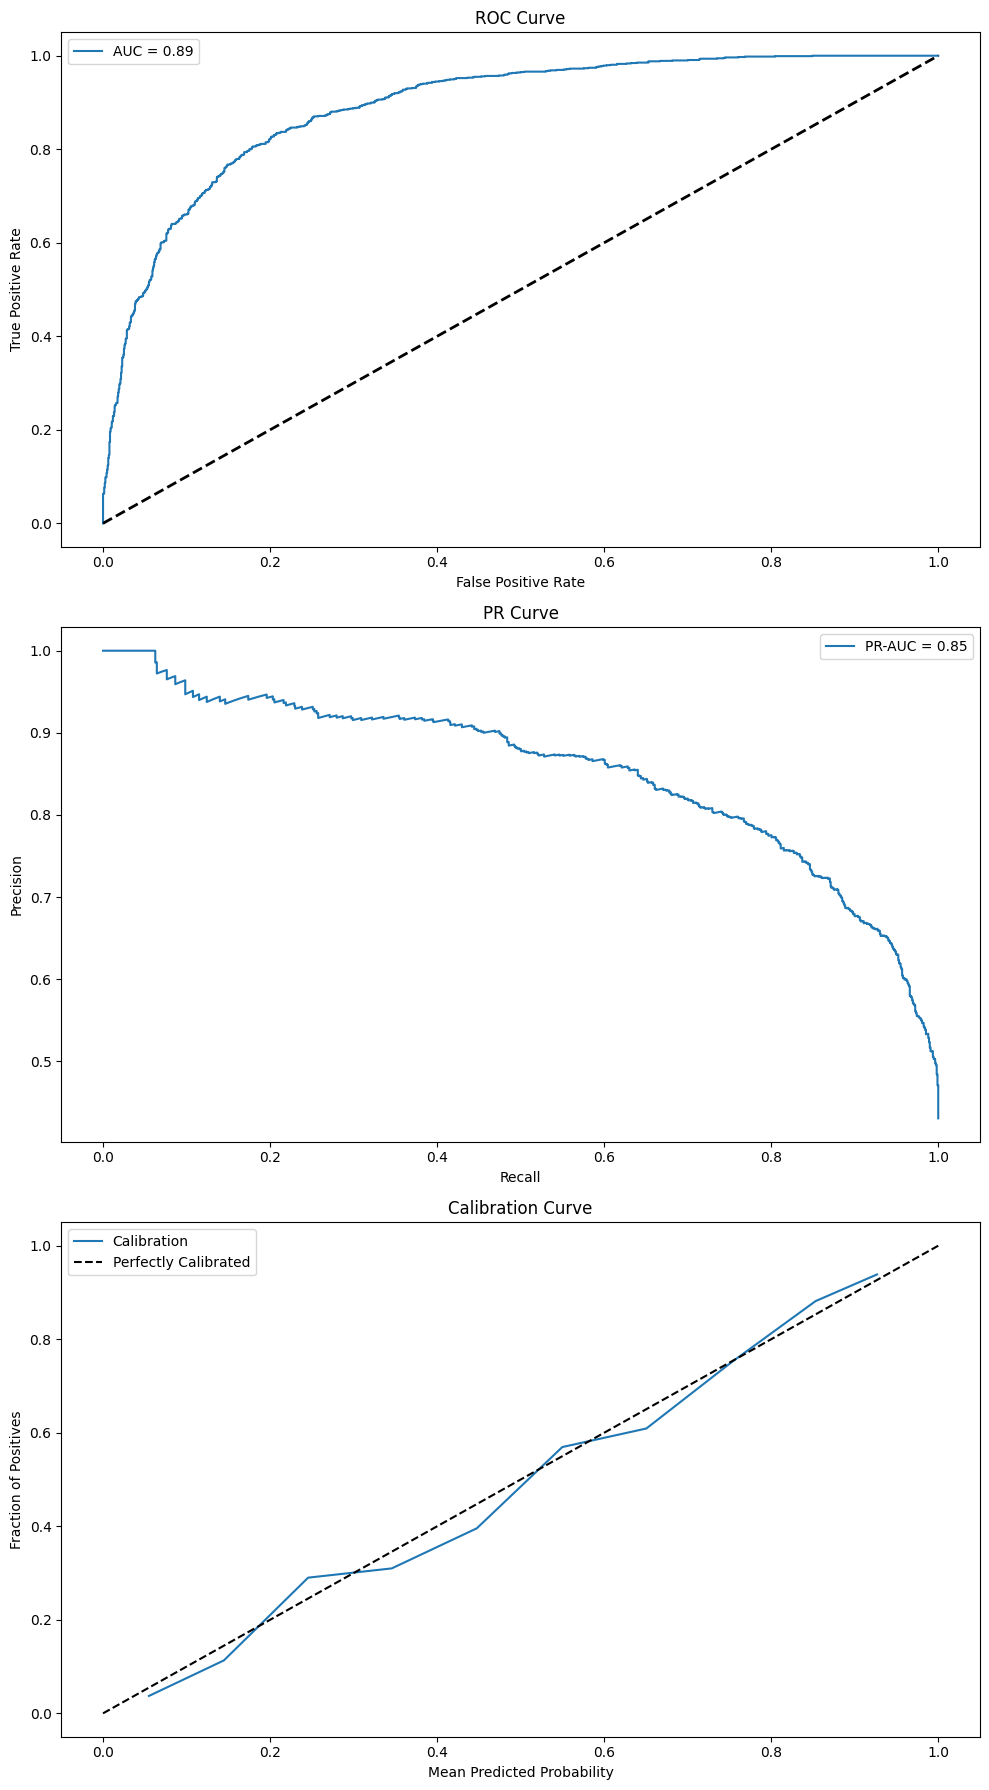

Specificity : 0.8275
Sensitivity : 0.7958
Accuracy : 0.8139
Precision : 0.7772
F1 score : 0.7864
Of 1438 people who did not have a prolonged LOS, 1190 (82.75%) were correctly classified.
Of 1087 people who did have a prolonged LOS, 865 (79.58%) were correctly classified.
summary_first_rfd_to_discharge_hrs
summary_total_hrs_nmr
summary_first_edd_to_discharge_hrs
viz_drg_Septicemia or severe sepsis w/o mv >96 hours w mcc
viz_age
viz_drg_Respiratory infections & inflammations w mcc
viz_drg_Rare
viz_right_service_collapsed_yn
thro_admit_order_to_ed_dept_hrs
viz_disp_collapsed_Other
thro_ed_arrival_time_Afternoon
viz_ynhhs_sg2_service_Digestive Health - Medical
viz_service_collapsed_Medicine
thro_door_to_admit_order_hrs
con_max_admit_order_to_consult_order_any_hrs
viz_service_collapsed_Surgical Services
icu_any_icu_yn
viz_drg_Esophagitis, gastroent & misc digest disorders w/o mcc
summary_first_rfd_day_Mon
img_avg_admit_order_to_imaging_order_any_hrs
rfd_last_nmr_to_discharge_hrs
viz_drg_Cel

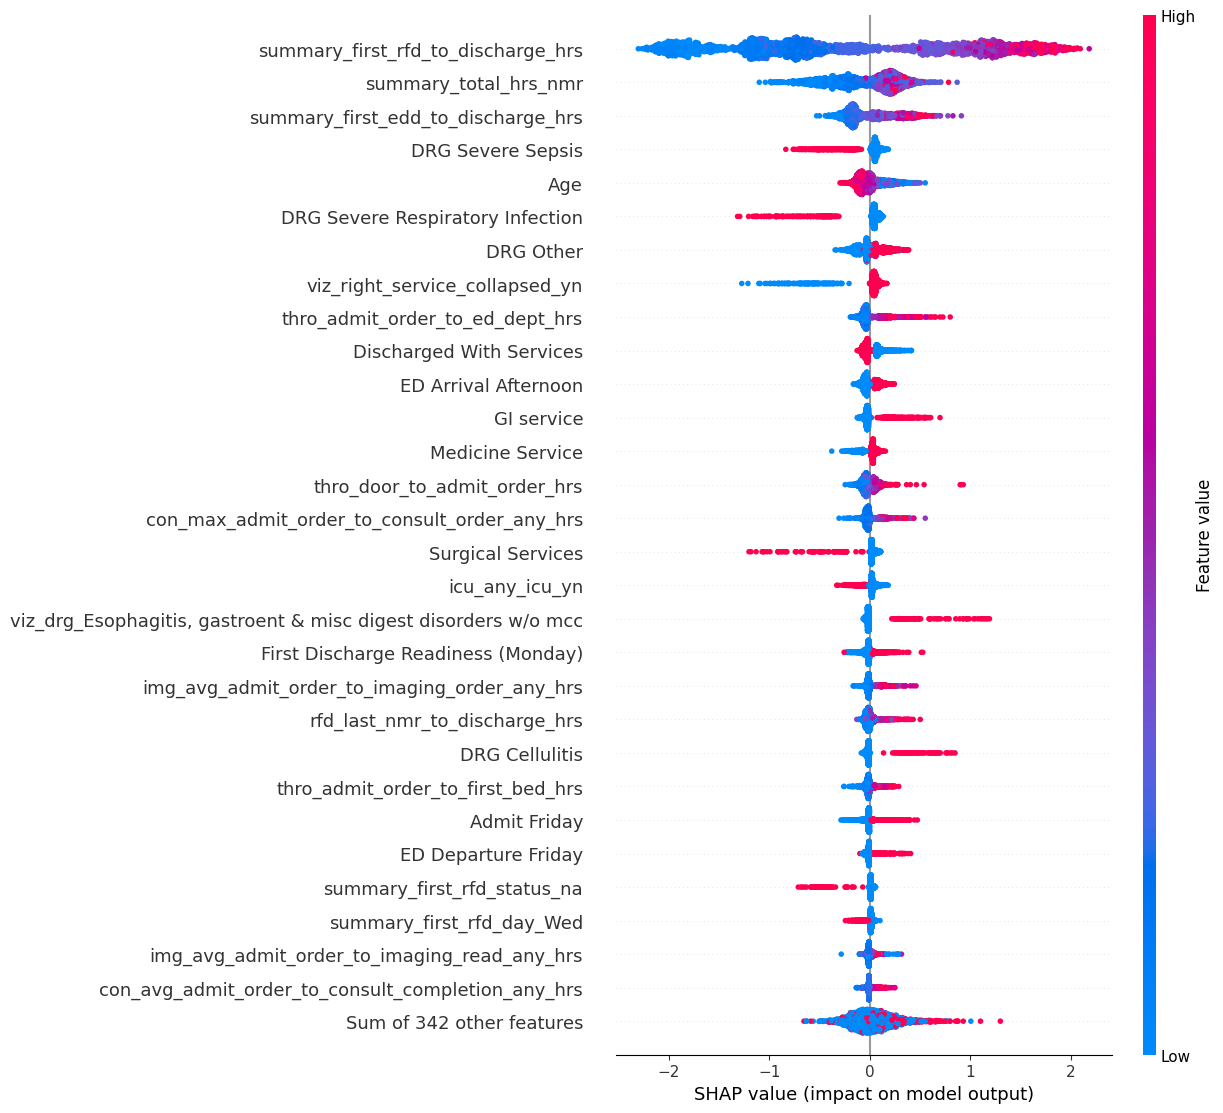

Plots for df_all_continuous_2024-08-07 saved to /gpfs/milgram/project/rtaylor/imc33/LOS/output
Running on df_home
Columns with >99% missing values ['summary_pt_consult_order_time', 'summary_pt_consult_order_day', 'summary_sw_consult_order_time', 'summary_sw_consult_order_day', 'con_max_consult_order_to_sign_colon_and_rectal_hrs', 'con_max_consult_order_to_sign_lab_medicine_hrs', 'con_max_consult_order_to_sign_picc_hrs', 'con_max_consult_order_to_sign_palliative_hrs', 'con_max_consult_order_to_sign_radiation_oncology_hrs', 'con_max_consult_order_to_sign_pharmacy_hrs', 'con_max_consult_order_to_sign_internal_medicine_hrs', 'con_max_consult_order_to_sign_neuro_oncology_hrs', 'con_max_consult_order_to_sign_ophthalmology_hrs', 'con_max_consult_order_to_sign_physical_medicine_and_rehabilitation_hrs', 'con_max_consult_order_to_sign_geriatrics_hrs', 'con_max_consult_order_to_sign_trauma_hrs', 'con_max_consult_order_to_sign_cardiothoracic_surgery_hrs', 'con_max_consult_order_to_sign_rheumatolog

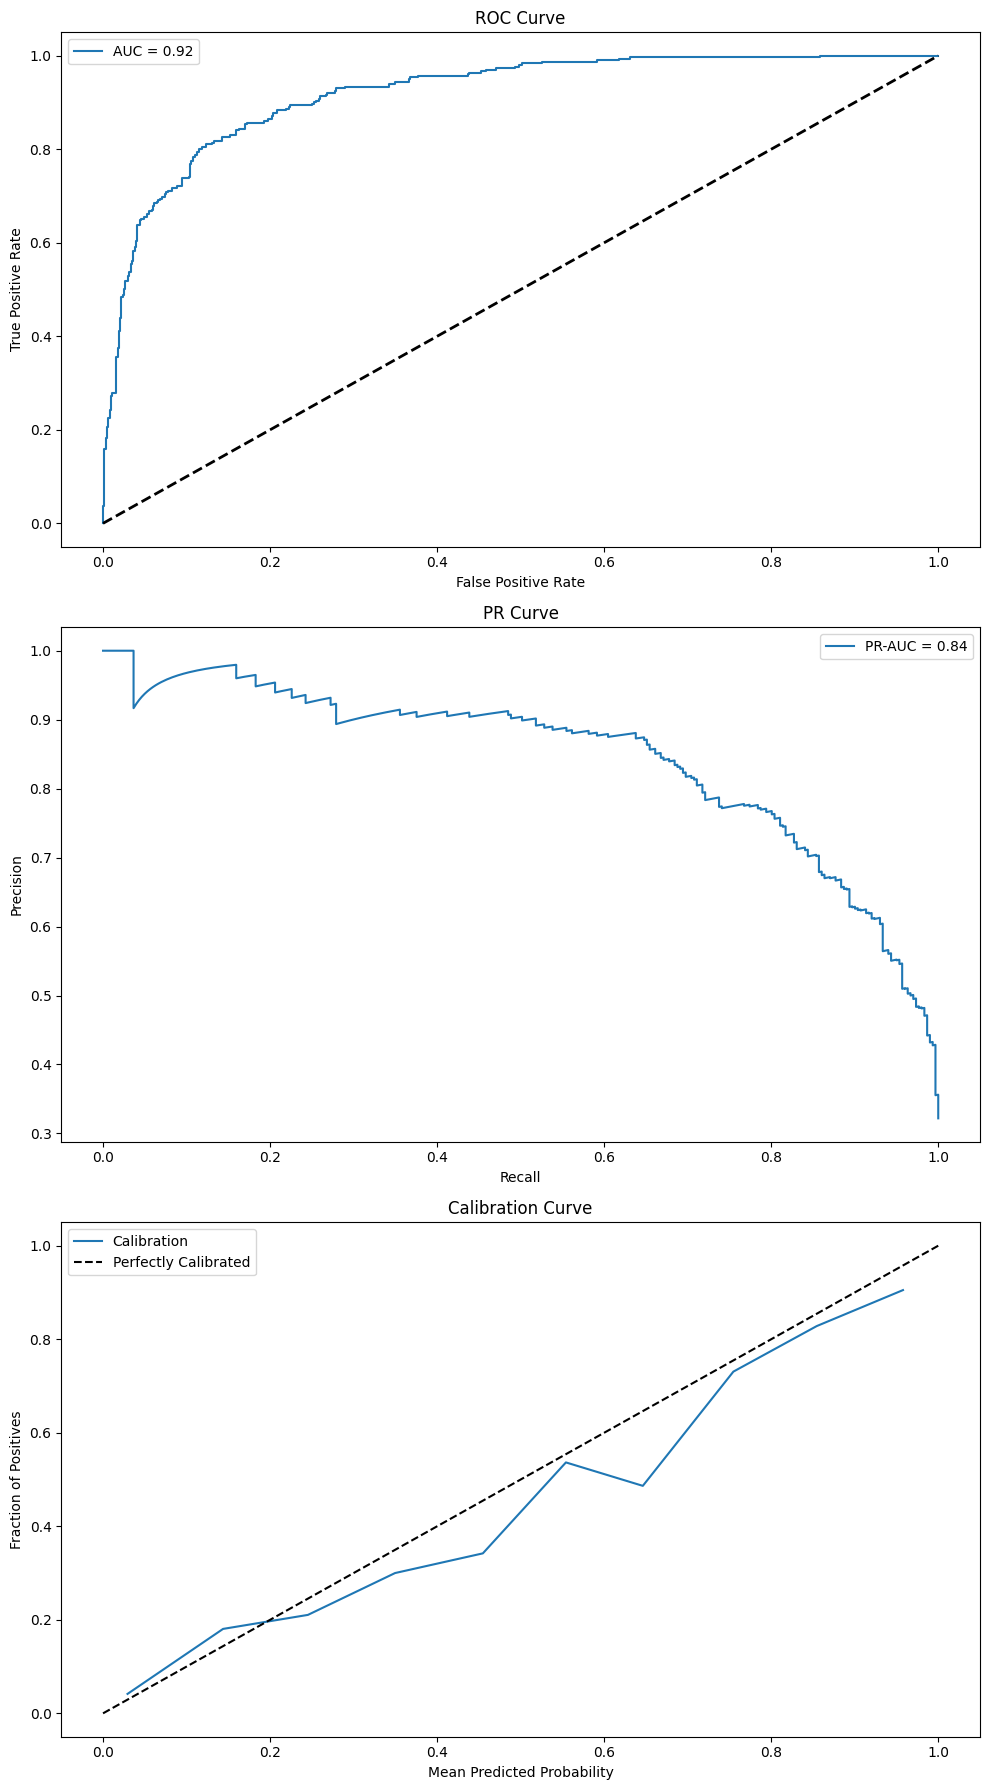

Specificity : 0.8912
Sensitivity : 0.7841
Accuracy : 0.8567
Precision : 0.7738
F1 score : 0.7789
Of 634 people who did not have a prolonged LOS, 565 (89.12%) were correctly classified.
Of 301 people who did have a prolonged LOS, 236 (78.41%) were correctly classified.
summary_first_rfd_to_discharge_hrs
summary_first_rfd_day_Mon
summary_first_edd_to_discharge_hrs
thro_admit_order_to_ed_dept_hrs
viz_age
viz_drg_Septicemia or severe sepsis w/o mv >96 hours w mcc
thro_door_to_admit_order_hrs
summary_last_edd_doc_to_discharge_hrs
summary_first_edd_doc_to_discharge_hrs
img_avg_admit_order_to_imaging_order_any_hrs
thro_ed_arrival_time_Afternoon
viz_drg_Esophagitis, gastroent & misc digest disorders w/o mcc
viz_drg_Respiratory infections & inflammations w mcc
viz_drg_Septicemia or severe sepsis w/o mv >96 hours w/o mcc
viz_drg_Cellulitis w/o mcc
census_daily_ed_count
summary_last_edd_to_discharge_hrs
viz_drg_Rare
thro_admit_or_obs_order_day_Fri
viz_ynhhs_sg2_service_Digestive Health - Medical


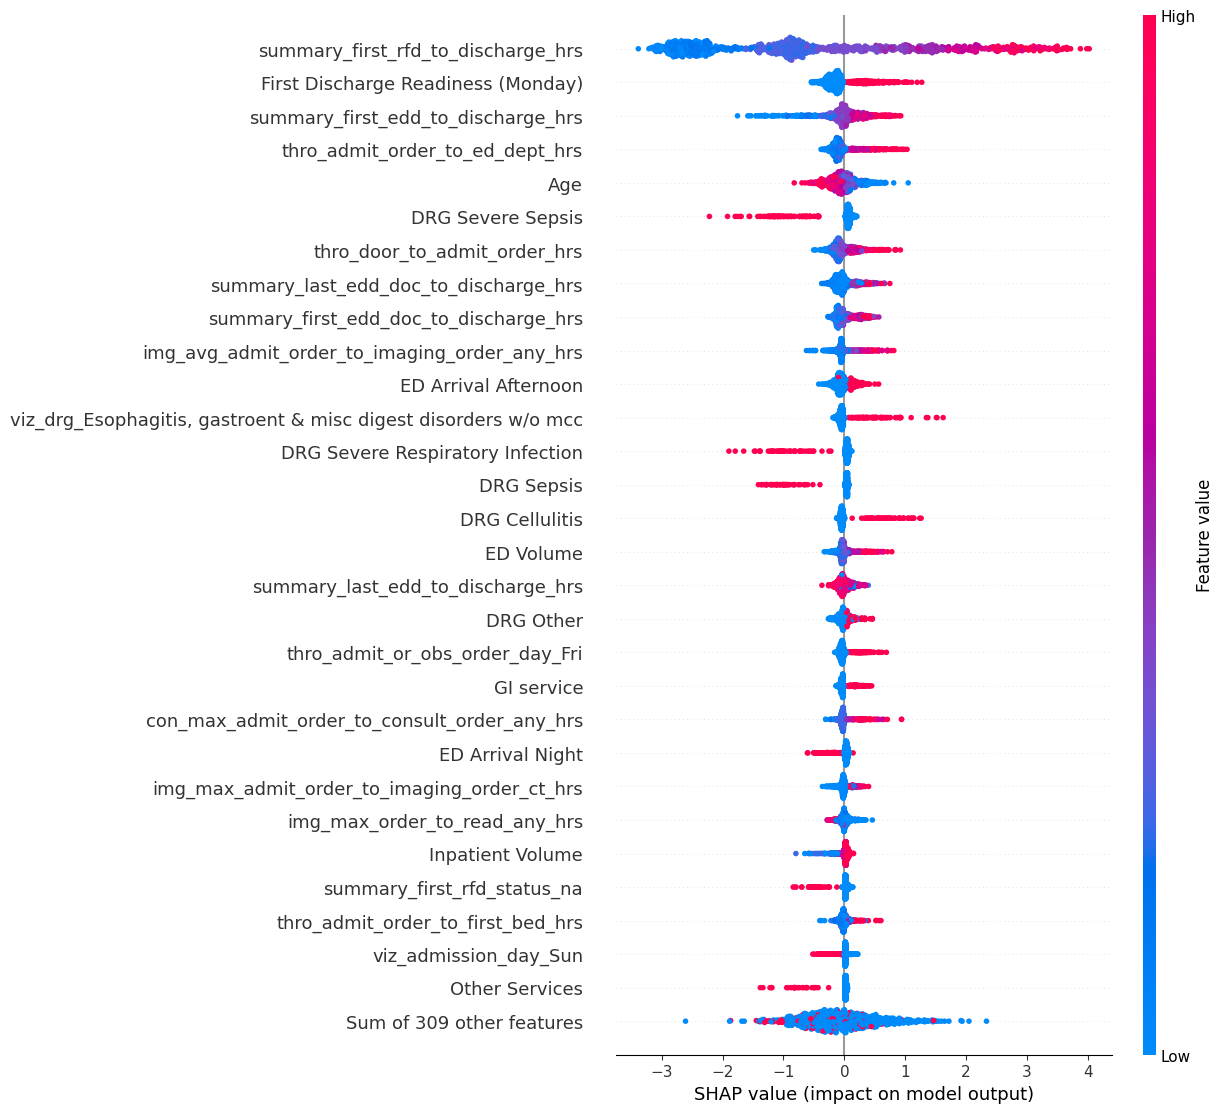

Plots for df_home_continuous_2024-08-07 saved to /gpfs/milgram/project/rtaylor/imc33/LOS/output
Running on df_hf
Columns with >99% missing values ['summary_pt_consult_order_time', 'summary_pt_consult_order_day', 'summary_sw_consult_order_time', 'summary_sw_consult_order_day', 'con_max_consult_order_to_sign_colon_and_rectal_hrs', 'con_max_consult_order_to_sign_lab_medicine_hrs', 'con_max_consult_order_to_sign_picc_hrs', 'con_max_consult_order_to_sign_radiation_oncology_hrs', 'con_max_consult_order_to_sign_hepatology_hrs', 'con_max_consult_order_to_sign_pharmacy_hrs', 'con_max_consult_order_to_sign_plastic_surgery_hrs', 'con_max_consult_order_to_sign_internal_medicine_hrs', 'con_max_consult_order_to_sign_neuro_oncology_hrs', 'con_max_consult_order_to_sign_neurosurgery_hrs', 'con_max_consult_order_to_sign_ophthalmology_hrs', 'con_max_consult_order_to_sign_physical_medicine_and_rehabilitation_hrs', 'con_max_consult_order_to_sign_addiction_medicine_hrs', 'con_max_consult_order_to_sign_otola

In [ ]:
# Run the function for each data frame and save the plots
for df_name, df_filt in dfs.items():
    print(f"Running on {df_name}")
    run_xgb_and_plot(df_filt, fp_continuous, output_folder, df_name, suffix="continuous")